In [11]:
import pandas as pd
import numpy as np
import ast  # For safely converting string to list
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

In [2]:

# Open the file and process it manually
data = []
with open("../dataset/MOLHW_preprocess_unicode/big.txt", "r", encoding="utf-8") as file:
    reader = csv.reader(file)  # Read file line by line
    
    for row in reader:
        if not row:
            continue  # Skip empty lines
        
        first_5_columns = row[:5]  # First 5 columns
        last_column = ",".join(row[5:])  # Join remaining columns to reconstruct the coordinate array
        
        try:
            coordinates = ast.literal_eval(last_column)  # Convert string to list safely
        except Exception as e:
            print(f"Error parsing coordinates: {last_column} - {e}")
            coordinates = None  # Handle errors gracefully
        
        data.append(first_5_columns + [coordinates])
df = pd.DataFrame(data, columns=["label", "author",  "width",  "height", "density", "coordinates"])


In [ ]:
# # Define file paths
# input_file = '../../dataset_preprocessing/MOLHW_preprocess_unicode/big.txt'  # Your large input file
# output_file = '../../dataset_preprocessing/MOLHW_preprocess_unicode/small.txt'  # File to save the first 1000 rows

# # Open the input file in read mode and output file in write mode
# with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
#     # Read the first 1000 lines
#     for i, line in enumerate(infile):
#         if i < 1000:
#             outfile.write(line)  # Write the line to the output file
#         else:
#             break  # Stop after 1000 lines

In [ ]:
def plot_points(x):
    """
    Plots individual points from a list of coordinate points and connects neighboring points with lines,
    but avoids drawing lines across (-1, -1) separators.
    """

    coords = df.iloc[x]['coordinates'][1:]
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))  

    # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):  
            if current_segment:  
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    # Plot lines and points with distinct colors
    colors = ['blue', 'green', 'orange', 'purple', 'brown']  # Color options for segments
    for i, segment in enumerate(segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')  
        
           

    # Flip Y-axis to match image coordinates
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.gca().invert_yaxis()

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)

    # Add title
    plt.title(df.iloc[x]['label'], fontsize=12, fontweight='bold')
    
    
    plt.show()

    



In [42]:
def preprocess_image(x):
    coords = df.iloc[x]['coordinates'][1:]
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))  

    # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):  
            if current_segment:  
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    # Plot lines and points with distinct colors
    colors = ['blue', 'green', 'orange', 'purple', 'brown']  # Color options for segments
    for i, segment in enumerate(segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')  
        
           

    # Flip Y-axis to match image coordinates
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.gca().invert_yaxis()

    plt.axis("off")

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.savefig("output_image.png", dpi=150, bbox_inches="tight", pad_inches=0)
    plt.show()

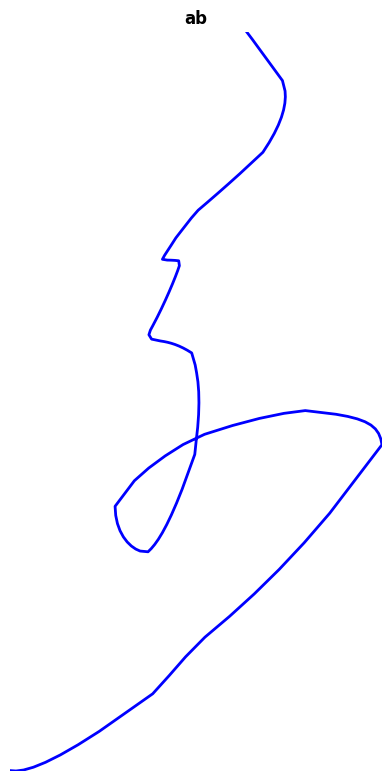

In [41]:
# Plot the points
plot_points(3)

In [35]:
df.iloc[0]['coordinates']

[[-1, -1],
 [0.7425679968102712, 0.0],
 [0.7542637454174199, 0.003096760566047288],
 [0.7706594700182252, 0.0074706688306658995],
 [0.7892211062763235, 0.012477521693024863],
 [0.8074145898553509, 0.017473116052293063],
 [0.8292708745779843, 0.024150721734217253],
 [0.8437623622968939, 0.029098824017487538],
 [0.8529173311632033, 0.03286915171969444],
 [0.8610806700696183, 0.03752322272198981],
 [0.8477284356266453, 0.05607077721313155],
 [0.8346629276463275, 0.06670582471825275],
 [0.818309099017343, 0.078482283160485],
 [0.7988328659143844, 0.09118553163056363],
 [0.7764001445121463, 0.10460094921922435],
 [0.751176850985322, 0.11851391501720257],
 [0.723328901508606, 0.13270980811523392],
 [0.6930222122566909, 0.1469740076040539],
 [0.660422699404271, 0.16109189257439802],
 [0.5862094375953169, 0.19015469684907815],
 [0.5541344748336708, 0.2023618371470375],
 [0.5252915918539132, 0.21311666363904522],
 [0.4998040327790427, 0.2224920718903278],
 [0.4890020711310719, 0.230560957466111

In [64]:
def preprocess_imagea(x):
    coords = df.iloc[x]['coordinates'][1:]  
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))

    # Convert normalized coordinates to image dimensions
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate stroke segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    processed_segments = []

    for segment in segments:
        if len(segment) < 2:
            continue

        points = np.array(segment)

        # 1. **Interpolation using B-spline**
        tck, u = splprep(points.T, s=0)  
        u_new = np.linspace(0, 1, 100)  
        interpolated_points = np.array(splev(u_new, tck)).T  

        # 2. **Resampling (Uniform Spacing)**
        def resample_curve(points, num_samples=50):
            distances = np.cumsum(np.sqrt(np.sum(np.diff(points, axis=0) ** 2, axis=1)))
            distances = np.insert(distances, 0, 0)  
            uniform_distances = np.linspace(0, distances[-1], num_samples)  
            resampled_points = np.array([np.interp(uniform_distances, distances, points[:, i]) for i in range(2)]).T  
            return resampled_points

        resampled_points = resample_curve(interpolated_points)

        # 3. **Deletion (Threshold Check)**
        if len(resampled_points) < 50:
            continue  # Skip samples with too few points

        # 4. **Normalization (Centering & Y-Inversion)**
        def normalize_points(points, canvas_size=(img_width, img_height)):
            min_vals = points.min(axis=0)
            max_vals = points.max(axis=0)

            # Center the points
            centered_points = points - (min_vals + max_vals) / 2

            # Scale proportionally
            scale_factor = min(canvas_size[0] / (max_vals[0] - min_vals[0]), 
                                canvas_size[1] / (max_vals[1] - min_vals[1]))
            normalized_points = centered_points * scale_factor + np.array(canvas_size) / 2  

            # **Fix Y-axis inversion (Flip Y-coordinates manually)**
            normalized_points[:, 1] = canvas_size[1] - normalized_points[:, 1]

            return normalized_points

        normalized_points = normalize_points(resampled_points)
        processed_segments.append(normalized_points)

    # **Plot Processed Segments**
    colors = ['blue', 'green', 'orange', 'purple', 'brown']
    for i, segment in enumerate(processed_segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')

    # Set image properties
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    # Ensure correct Y orientation
    plt.axis("off")

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.savefig("output_image.png", dpi=150, bbox_inches="tight", pad_inches=0)

    plt.show()


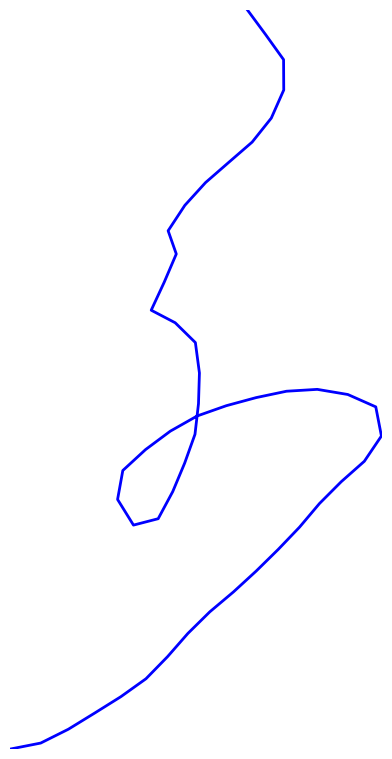

In [65]:
preprocess_imagea(3)